In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# functions f1 and f2
def f1(x):
    return torch.sin(5 * np.pi * x) / (5 * np.pi * x)

def f2(x):
    return torch.sign(torch.sin(5 * np.pi * x))

In [3]:
# Generating data for both functions
x = torch.linspace(-1, 1, 1000).reshape(-1, 1)  # Inputs between -1 and 1
y1 = f1(x)  # Output for f1
y2 = f2(x)  # Output for f2

In [4]:
# Defining the three models
class Model0(nn.Module):
    def __init__(self):
        super(Model0, self).__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)
        self.fc5 = nn.Linear(10, 10)
        self.fc6 = nn.Linear(10, 5)
        self.fc7 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        return self.fc7(x)

class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 18)
        self.fc3 = nn.Linear(18, 15)
        self.fc4 = nn.Linear(15, 4)
        self.fc5 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(1, 190)
        self.fc2 = nn.Linear(190, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

In [5]:
# Training model
def train_model(model, x_train, y_train, epochs=20000, learning_rate=0.001, print_interval=1000):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    loss_history = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        # Printing training progress 
        if (epoch + 1) % print_interval == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')

    return loss_history

In [6]:
# predictions for all models on a single graph
def plot_all_predictions(models, x, y, titles, func_name):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'True Function {func_name}', color='black', linewidth=2)

    for i, model in enumerate(models):
        model.eval()
        with torch.no_grad():
            predictions = model(x).detach().numpy()
        plt.plot(x, predictions, label=f'Predictions {titles[i]}')

    plt.title(f'Model Predictions vs. True Function {func_name}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# training losses for all models
def plot_training_losses(loss_histories, titles, func_name):
    plt.figure(figsize=(10, 6))

    for i, loss_history in enumerate(loss_histories):
        plt.plot(loss_history, label=f'{titles[i]} Loss')

    plt.title(f'Training Loss for {func_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

Training and evaluating models for f1...
Epoch [1000/20000], Loss: 0.004706
Epoch [2000/20000], Loss: 0.002668
Epoch [3000/20000], Loss: 0.000275
Epoch [4000/20000], Loss: 0.000245
Epoch [5000/20000], Loss: 0.000225
Epoch [6000/20000], Loss: 0.000218
Epoch [7000/20000], Loss: 0.000211
Epoch [8000/20000], Loss: 0.000209
Epoch [9000/20000], Loss: 0.000208
Epoch [10000/20000], Loss: 0.000208
Epoch [11000/20000], Loss: 0.000208
Epoch [12000/20000], Loss: 0.000207
Epoch [13000/20000], Loss: 0.000207
Epoch [14000/20000], Loss: 0.000207
Epoch [15000/20000], Loss: 0.000206
Epoch [16000/20000], Loss: 0.000208
Epoch [17000/20000], Loss: 0.000205
Epoch [18000/20000], Loss: 0.000205
Epoch [19000/20000], Loss: 0.000205
Epoch [20000/20000], Loss: 0.000205
Epoch [1000/20000], Loss: 0.002871
Epoch [2000/20000], Loss: 0.002858
Epoch [3000/20000], Loss: 0.002855
Epoch [4000/20000], Loss: 0.002852
Epoch [5000/20000], Loss: 0.002864
Epoch [6000/20000], Loss: 0.002849
Epoch [7000/20000], Loss: 0.002848
Epo

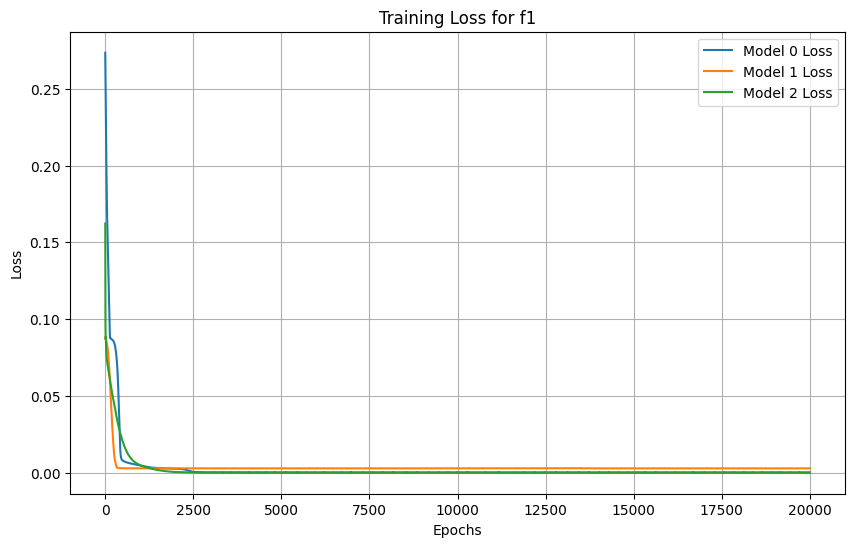

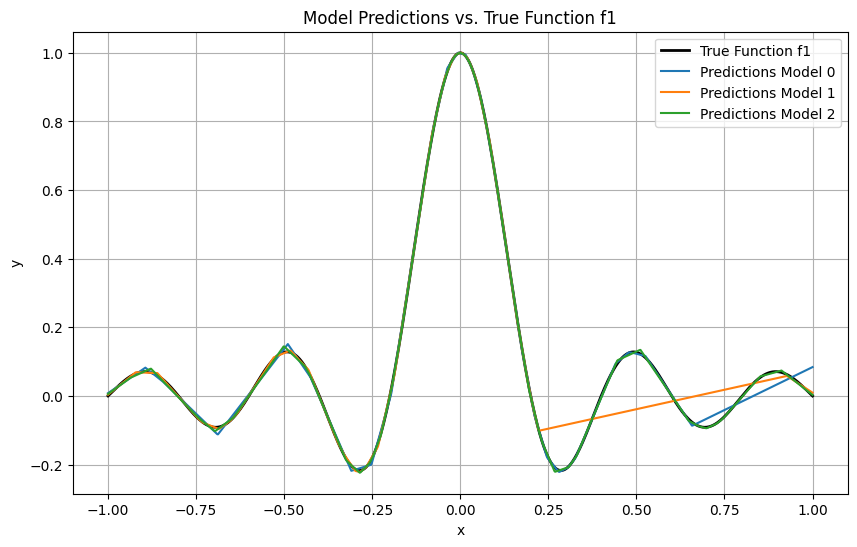

In [7]:
# Training and evaluating f1 sin(5 * np.pi * x) / (5 * np.pi * x)
print("Training and evaluating models for f1...")

# Instantiate models for f1
model0_f1 = Model0()
model1_f1 = Model1()
model2_f1 = Model2()

# Train models for f1 and store the loss history
loss_history_model0_f1 = train_model(model0_f1, x, y1)
loss_history_model1_f1 = train_model(model1_f1, x, y1)
loss_history_model2_f1 = train_model(model2_f1, x, y1)

# Plot training losses for f1
plot_training_losses([loss_history_model0_f1, loss_history_model1_f1, loss_history_model2_f1], ['Model 0', 'Model 1', 'Model 2'], 'f1')

# Plot predictions for f1
plot_all_predictions([model0_f1, model1_f1, model2_f1], x, y1, ['Model 0', 'Model 1', 'Model 2'], 'f1')


Training and evaluating models for f2...
Epoch [1000/20000], Loss: 0.113311
Epoch [2000/20000], Loss: 0.065675
Epoch [3000/20000], Loss: 0.056683
Epoch [4000/20000], Loss: 0.052807
Epoch [5000/20000], Loss: 0.028481
Epoch [6000/20000], Loss: 0.024101
Epoch [7000/20000], Loss: 0.021963
Epoch [8000/20000], Loss: 0.020218
Epoch [9000/20000], Loss: 0.019365
Epoch [10000/20000], Loss: 0.017789
Epoch [11000/20000], Loss: 0.021626
Epoch [12000/20000], Loss: 0.018462
Epoch [13000/20000], Loss: 0.015400
Epoch [14000/20000], Loss: 0.036130
Epoch [15000/20000], Loss: 0.014736
Epoch [16000/20000], Loss: 0.014511
Epoch [17000/20000], Loss: 0.013724
Epoch [18000/20000], Loss: 0.015928
Epoch [19000/20000], Loss: 0.013590
Epoch [20000/20000], Loss: 0.012969
Epoch [1000/20000], Loss: 0.892264
Epoch [2000/20000], Loss: 0.890144
Epoch [3000/20000], Loss: 0.889639
Epoch [4000/20000], Loss: 0.889329
Epoch [5000/20000], Loss: 0.889138
Epoch [6000/20000], Loss: 0.888918
Epoch [7000/20000], Loss: 0.888891
Ep

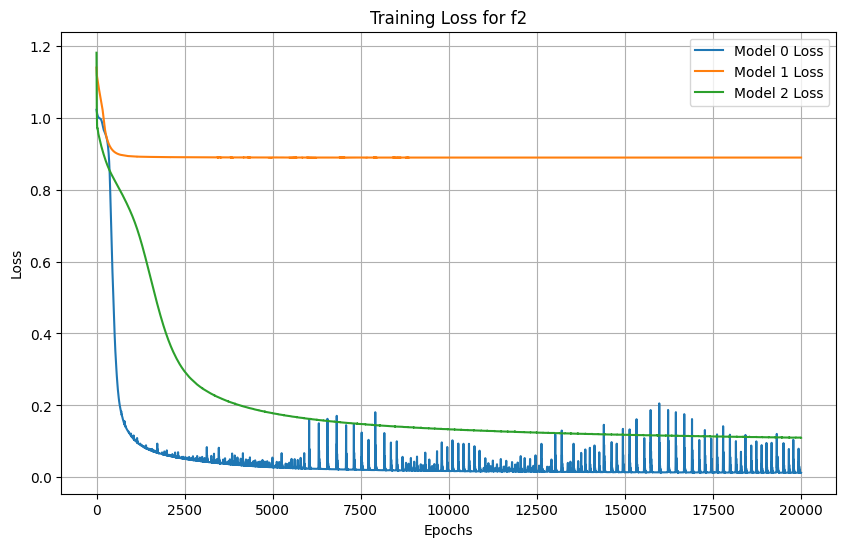

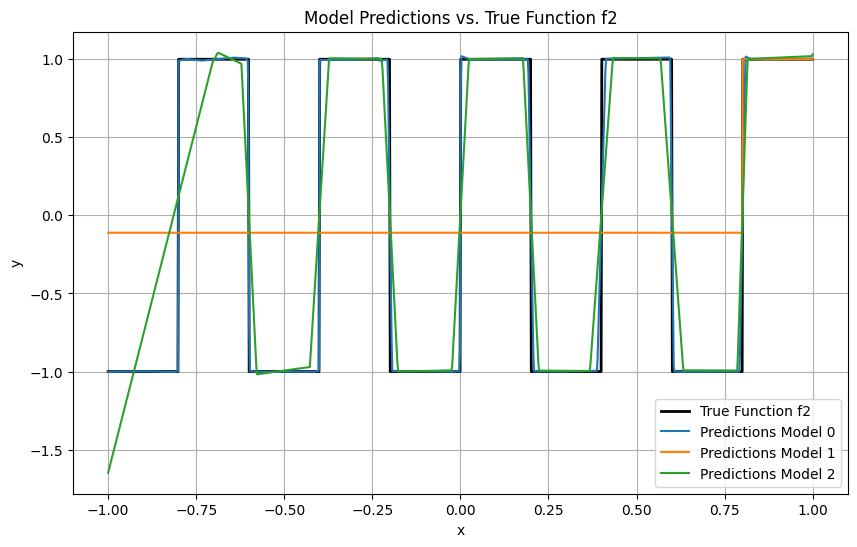

In [8]:
# Training and evaluating f2 sign(torch.sin(5 * np.pi * x))
print("\nTraining and evaluating models for f2...")

# Instantiate models for f2
model0_f2 = Model0()
model1_f2 = Model1()
model2_f2 = Model2()

# Train models for f2 and store the loss history
loss_history_model0_f2 = train_model(model0_f2, x, y2)
loss_history_model1_f2 = train_model(model1_f2, x, y2)
loss_history_model2_f2 = train_model(model2_f2, x, y2)

# Plot training losses for f2
plot_training_losses([loss_history_model0_f2, loss_history_model1_f2, loss_history_model2_f2], ['Model 0', 'Model 1', 'Model 2'], 'f2')

# Plot predictions for f2
plot_all_predictions([model0_f2, model1_f2, model2_f2], x, y2, ['Model 0', 'Model 1', 'Model 2'], 'f2')